## Logistic Regression Coefficients

**Linear regression** predicts a **quantitative response Y** on the basis of **predictor variables X1, X2, ... Xn.** It assumes that there is a **linear relationship between X(s) and Y.** Mathematically, we write this linear relationship as Y ≈ β0 + β1X1 + β2X2 + ... + βnXn.

**The magnitude of the coefficients is directly influenced by the scale of the features**. Therefore, to compare coefficients across features, it is importance that **all features are within a similar scale.** This is why, **normalisation is important** for **variable importance and feature selection** in linear models.

Linear Regression makes the following assumptions over the predictor variables X: **Linear relationship** with the outcome Y! **Multivariate normality** (X should follow a **Gaussian distribution**)! No or little **multicollinearity** (Xs should not be linearly related to one another)! **Homoscedasticity** (homogeneity of variance, variance should be the same) That means: In a situation the error term (noise, random disturbance) is the same across all values of the independent variables.

In addition, these coefficients may be **penalised by regularisation**, therefore being smaller than if we were to compare the relationship of each feature with the target individually.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

In [2]:
data = pd.read_csv('dataset_2.csv')
data.shape

(50000, 109)

In [3]:
data.head()

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,...,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109
0,4.532710,3.280834,17.982476,4.404259,2.349910,0.603264,2.784655,0.323146,12.009691,0.139346,...,2.079066,6.748819,2.941445,18.360496,17.726613,7.774031,1.473441,1.973832,0.976806,2.541417
1,5.821374,12.098722,13.309151,4.125599,1.045386,1.832035,1.833494,0.709090,8.652883,0.102757,...,2.479789,7.795290,3.557890,17.383378,15.193423,8.263673,1.878108,0.567939,1.018818,1.416433
2,1.938776,7.952752,0.972671,3.459267,1.935782,0.621463,2.338139,0.344948,9.937850,11.691283,...,1.861487,6.130886,3.401064,15.850471,14.620599,6.849776,1.098210,1.959183,1.575493,1.857893
3,6.020690,9.900544,17.869637,4.366715,1.973693,2.026012,2.853025,0.674847,11.816859,0.011151,...,1.340944,7.240058,2.417235,15.194609,13.553772,7.229971,0.835158,2.234482,0.946170,2.700606
4,3.909506,10.576516,0.934191,3.419572,1.871438,3.340811,1.868282,0.439865,13.585620,1.153366,...,2.738095,6.565509,4.341414,15.893832,11.929787,6.954033,1.853364,0.511027,2.599562,0.811364


**Important**

In all feature selection procedures, it is good practice to **select the features by examining only the training set** to **avoid overfit.**

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target'], axis=1),
    data['target'],
    test_size=0.3,
    random_state=0)
X_train.shape, X_test.shape

((35000, 108), (15000, 108))

**Scale the variables, so we fit a scaler!**

In [5]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

**Do the model fitting and feature selection altogether in 2 lines of code!**

Specify the Logistic Regression model! Here the **Ridge Penalty** (l2)(default parameter)! Evaluate the coefficient magnitude! If we want to avoid **regularisation** at all, so the coefficients are not affected (modified) by the penalty of the regularisation! In order to do this in sklearn, set the parameter C really high which is basically like fitting a non-regularised logistic regression! Then use the **selectFromModel** object from sklearn to **automatically select the features**! Set C to 1000, to avoid regularisation!

In [6]:
sel_ = SelectFromModel(
    LogisticRegression(C=1000, penalty='l2', max_iter=300, random_state=10))
sel_.fit(scaler.transform(X_train), y_train)

SelectFromModel(estimator=LogisticRegression(C=1000, max_iter=300,
                                             random_state=10))

**Visualise those features kept!** sklearn will select those features which coefficients are greater than **the mean of all the coefficients.** It compares absolute values of coefficients. More on this in a second.

In [7]:
sel_.get_support()

array([False, False,  True, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False,  True, False,  True,  True, False,  True, False,
       False, False, False, False,  True,  True, False, False, False,
       False, False,  True,  True, False, False, False, False, False,
       False, False,  True, False,  True, False,  True, False, False,
        True,  True, False, False, False,  True, False,  True, False,
       False, False, False, False,  True,  True, False,  True, False,
        True, False, False,  True, False, False,  True, False, False,
        True,  True, False, False, False,  True,  True, False,  True,
       False,  True, False, False, False, False,  True, False,  True,
       False,  True, False, False, False,  True, False, False, False])

**Add the variable names and order it for clearer visualisation sum the number of selected features!**

In [8]:
selected_feat = X_train.columns[(sel_.get_support())]
len(selected_feat)

33

**With the parameter coef_ we access the coefficients of the variables for the linear regression (for all the 108 variables)!**

In [9]:
sel_.estimator_.coef_

array([[ 1.15058685e-02, -1.34273064e-02,  1.09418579e-01,
         2.64978405e-02,  4.33743271e-02, -2.46324945e-02,
        -3.34439748e-02, -6.15440598e-03,  2.32350569e-02,
        -9.82497718e-03,  7.95904374e-02,  5.29315203e-02,
        -3.74840918e-02,  1.92379045e-02, -3.86501888e-02,
         2.76388087e-02,  1.36400868e-02,  5.42856088e-02,
         1.29306748e-02,  1.54110011e-02,  1.41541358e-01,
         2.41407101e-02, -1.28504438e-01,  1.26714620e-01,
         1.43794686e-02,  6.34978620e-02,  2.76183846e-02,
        -8.27789794e-04, -1.41164391e-02, -1.42880837e-02,
         6.88132059e-03, -1.85507066e-01, -1.00481533e-01,
         3.27108262e-02,  1.18302070e-02,  4.35703965e-02,
         1.95384263e-02,  4.49020897e-02,  7.88405350e-02,
         7.01749379e-02, -3.51258840e-03, -2.42521892e-03,
        -5.35616597e-02,  5.64204718e-02,  3.64464826e-03,
         3.04528045e-02,  4.78227389e-03,  4.22753833e-01,
         2.18085686e-02,  7.29872149e-02,  1.50445280e-0

**As SelectFromModel selects coefficients** above the mean of all coefficients, calculate **first the mean!**

In [10]:
sel_.estimator_.coef_.mean()

0.012044643884716435

**Plot the distribution of coefficients!**

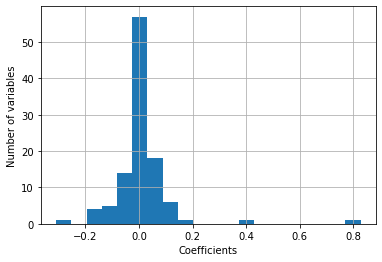

In [11]:
pd.Series(sel_.estimator_.coef_.ravel()).hist(bins=20)
plt.xlabel('Coefficients')
plt.ylabel('Number of variables')
plt.show()

As expected, **some coefficients are positive and some are negative**, suggesting that some features are negatively associated with the outcome (the more of the feature the less of the outcome) and viceversa. However, **the absolute value of the coefficients inform about the importance of the feature on the outcome,** and not the sign. Therefore, the feature selection is done **filtering on absolute values of coefficients**. See below.

In [12]:
np.abs(sel_.estimator_.coef_).mean()  # recalculate the mean using the absolute values instead!

0.05683100045329386

**Plot the histogram of absolute coefficients!**

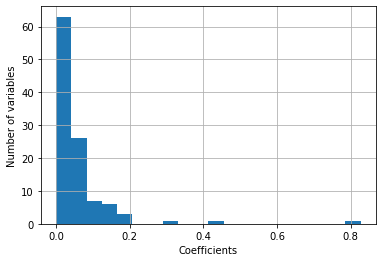

In [13]:
pd.Series(np.abs(sel_.estimator_.coef_).ravel()).hist(bins=20)
plt.xlabel('Coefficients')
plt.ylabel('Number of variables')
plt.show()

Compare the  **number of selected features** with the number of features which coefficient is above the mean coefficient, to make sure we understand the output of **SelectFromModel**

In [14]:
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print(
    'features with coefficients greater than the mean coefficient: {}'.format(
        np.sum(
            np.abs(sel_.estimator_.coef_) > np.abs(
                sel_.estimator_.coef_).mean())))

total features: 108
selected features: 33
features with coefficients greater than the mean coefficient: 33


Therefore, we see **how select from model works**. It will select **all the coefficients which absolute values are greater** than the mean. To do this, you need to **change the default value of the parameter threshold** that can be passed to **SelectFromModel.** More details in the Scikit-learn documentation: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html